In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress the LinAlgWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


In [2]:
# Generate a synthetic dataset for regression
X = np.random.rand(100, 1) * 10
y = (2 * X**2 - 3 * X + 1 + 15 * np.random.randn(100, 1)).reshape(-1,)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree 15
poly = PolynomialFeatures(degree=15)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

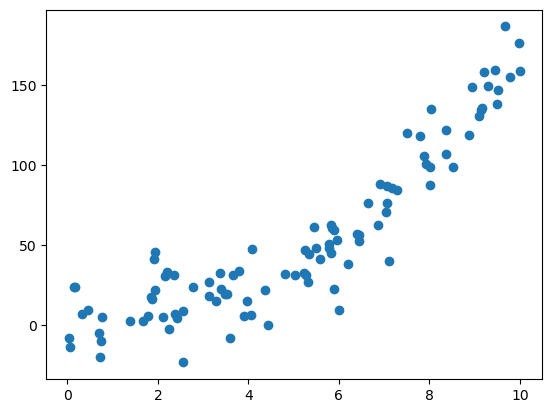

In [4]:
plt.scatter(X,y)

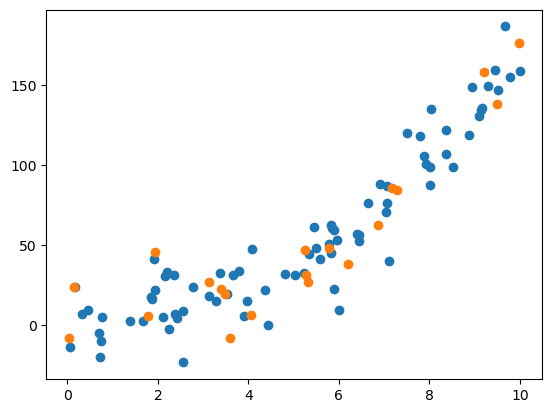

In [5]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)


### Ridge regularization

In [6]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train_poly, y_train)

Ridge()

In [9]:
#make predictions 
y_pred_ridge = ridge_model.predict(X_test_poly)


In [10]:
#evaluate the model 
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("Mean Squared Error:", ridge_mse)
print("R-squared Score:", ridge_r2)

Ridge Regression Results:
Mean Squared Error: 224.75982848411758
R-squared Score: 0.9143845335341177


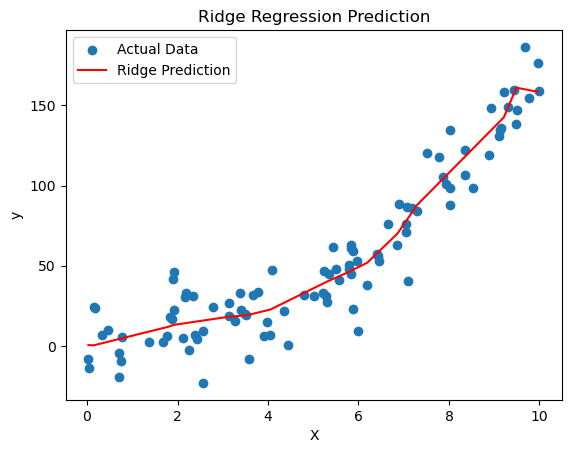

In [11]:
# Sort X_test and y_pred_ridge by X_test for a smoother plot
X_test_sorted, y_pred_ridge_sorted = zip(*sorted(zip(X_test, y_pred_ridge)))
# plot the original data points
plt.scatter(X, y, label = "Actual Data")
# Plot the Ridge regression prediction curve
plt.plot(X_test_sorted, y_pred_ridge_sorted, color = "red", label="Ridge Prediction")

plt.title("Ridge Regression Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [13]:
ridge_model.coef_

array([ 0.00000000e+00, -1.68933627e+00,  1.83069722e+00,  3.88923666e+00,
        1.43975526e+00, -2.40588492e+00, -1.29915275e+00,  2.68085972e+00,
       -1.67269809e+00,  5.96478406e-01, -1.37123072e-01,  2.10049170e-02,
       -2.13219504e-03,  1.37738178e-04, -5.12548924e-06,  8.36054470e-08])

### Lasso regularization

In [14]:
# Train Ridge and Lasso regression models
lasso_model = Lasso(alpha=1.0)  # You can change the alpha parameter for Lasso
lasso_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test_poly)

# Evaluate the models
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Results:")
print("Mean Squared Error:", lasso_mse)
print("R-squared Score:", lasso_r2)


Lasso Regression Results:
Mean Squared Error: 211.56738374480602
R-squared Score: 0.9194097968020213


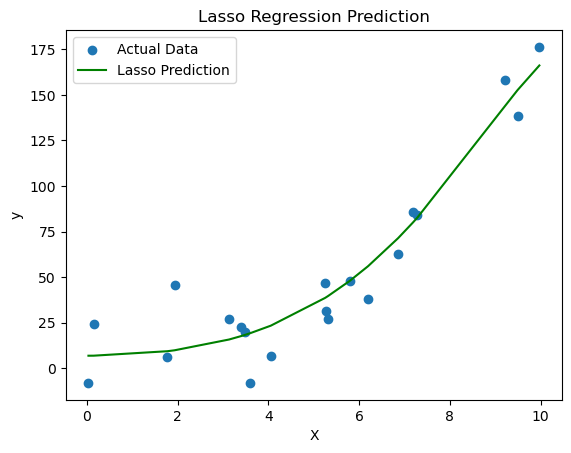

In [15]:
X_test_sorted, y_pred_lasso_sorted = zip(*sorted(zip(X_test, y_pred_lasso)))

# Plot the original data points
plt.scatter(X_test, y_test, label="Actual Data")

# Plot the Lasso regression prediction curve
plt.plot(X_test_sorted, y_pred_lasso_sorted, color='green', label="Lasso Prediction")

plt.title("Lasso Regression Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [16]:
lasso_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  6.70860768e-01,  5.43462753e-02,
        5.72274808e-03,  3.07629427e-04,  3.69472471e-06, -1.14031938e-06,
       -1.58227743e-07, -1.37522919e-08, -8.89656413e-10, -3.80873053e-11,
       -3.03051054e-14,  1.64850512e-13,  9.50087654e-15, -2.07547319e-15])